# Small exercise on clustering


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings

warnings.filterwarnings('ignore')

#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_samples , silhouette_score
from sklearn.datasets import make_blobs
colormap = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

In [4]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=10,cluster_std=1,centers=3,
                  shuffle=True,center_box=(-2,2), n_features=2,random_state=54321)


In [6]:
X, y

(array([[ 1.75921544, -0.84664191],
        [ 1.49969879, -0.8262837 ],
        [ 1.70201088,  0.41253921],
        [ 0.05173659,  0.08354449],
        [ 2.14606047,  0.65069616],
        [ 0.99487547,  0.47927744],
        [-0.38187704, -0.04045527],
        [ 1.92975786,  0.27962795],
        [ 1.07209844,  0.54344191],
        [ 0.39204461,  0.64682097]]),
 array([1, 1, 0, 2, 0, 0, 2, 1, 0, 2]))

In [7]:
y = y.astype(int) #making y integers.


In [8]:
dataset = pd.DataFrame(np.column_stack((X,y)),columns=['x1','x2','y'])

In [9]:
dataset[['y']] = dataset[['y']].astype(int)

In [13]:
dataset.head(n=10)

,x1,x2,y
0,1.759215,-0.846642,1
1,1.499699,-0.826284,1
2,1.702011,0.412539,0
3,0.051737,0.083544,2
4,2.146060,0.650696,0
5,0.994875,0.479277,0
6,-0.381877,-0.040455,2
7,1.929758,0.279628,1
8,1.072098,0.543442,0
9,0.392045,0.646821,2


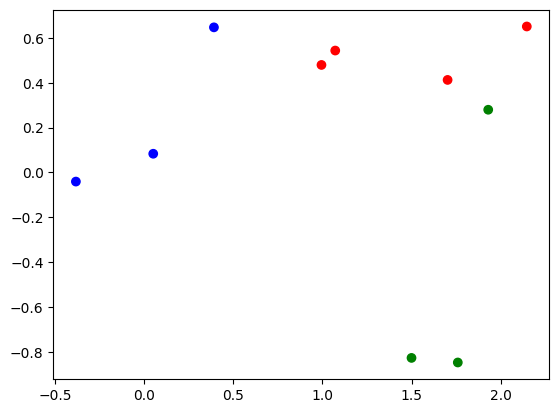

In [12]:

plt.scatter(X[:,0],X[:,1],c=[colormap[k] for k in y])
plt.show()


In [14]:
c0_members = dataset.query('y==0')

In [15]:
c0_members

,x1,x2,y
2,1.702011,0.412539,0
4,2.146060,0.650696,0
5,0.994875,0.479277,0
8,1.072098,0.543442,0


In [17]:
c1_members = dataset.query('y==1')

In [16]:
c2_members = dataset.query('y==2')

In [53]:
c0_members

,x1,x2,y
2,1.702011,0.412539,0
4,2.146060,0.650696,0
5,0.994875,0.479277,0
8,1.072098,0.543442,0


In [18]:
c1_members

,x1,x2,y
0,1.759215,-0.846642,1
1,1.499699,-0.826284,1
7,1.929758,0.279628,1


In [20]:
c0_members

,x1,x2,y
2,1.702011,0.412539,0
4,2.146060,0.650696,0
5,0.994875,0.479277,0
8,1.072098,0.543442,0


In [21]:
np.sum(c0_members[['x1']])

x1    5.915045
dtype: float64

In [55]:
np.sum(c0_members[['x2']])

x2    2.085955
dtype: float64

In [56]:
len(c0_members)

4

In [22]:
c0_centroid = [ np.sum(c0_members[['x1']])/len(c0_members),
                np.sum(c0_members[['x2']])/len(c0_members),
              ]

In [25]:
c1_centroid = [ np.sum(c1_members[['x1']])/len(c1_members),
                np.sum(c1_members[['x2']])/len(c1_members),
              ]

In [26]:
c2_centroid = [ np.sum(c2_members[['x1']])/len(c2_members),
                np.sum(c2_members[['x2']])/len(c2_members),
              ]

In [27]:
c0_centroid, c1_centroid, c2_centroid

([x1    1.478761
  dtype: float64,
  x2    0.521489
  dtype: float64],
 [x1    1.729557
  dtype: float64,
  x2   -0.464433
  dtype: float64],
 [x1    0.020635
  dtype: float64,
  x2    0.22997
  dtype: float64])

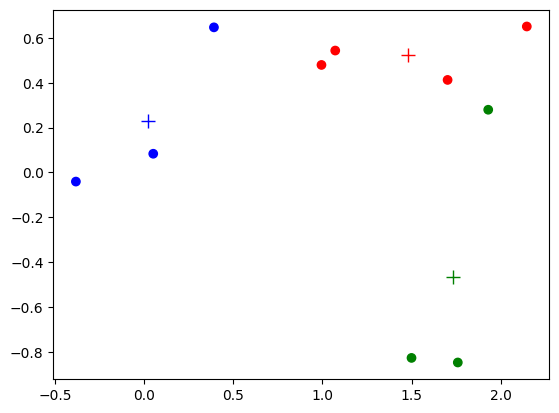

In [29]:

plt.scatter(X[:,0],X[:,1],c=[colormap[k] for k in y])
plt.plot(c0_centroid[0],c0_centroid[1],marker='+', markersize=10, color='r') 
plt.plot(c1_centroid[0],c1_centroid[1],marker='+', markersize=10, color='g') 
plt.plot(c2_centroid[0],c2_centroid[1],marker='+', markersize=10, color='b') 

plt.show()